<a href="https://colab.research.google.com/github/GabrielCdev/INEP_dataset_analysis/blob/main/INEP_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio final

##Enem 2021
"Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem."


Base para a atividade: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

###....:::: Membros ::::....
Áureo Ramos

Gabriel Borges Calheiros

Izadora de Oliveira Machado Paim

Laianne Protasio

##Objetivo:

Realizar uma análise explorátoria e, com base nela, aplicar algoritmos de Machine Learning através da Classificação para inferir qual/quais atributos são mais significativos para que o aluno obtenha uma média de 800 pontos na nota de corte.

https://blogdoenem.com.br/notas-de-corte-do-sisu/

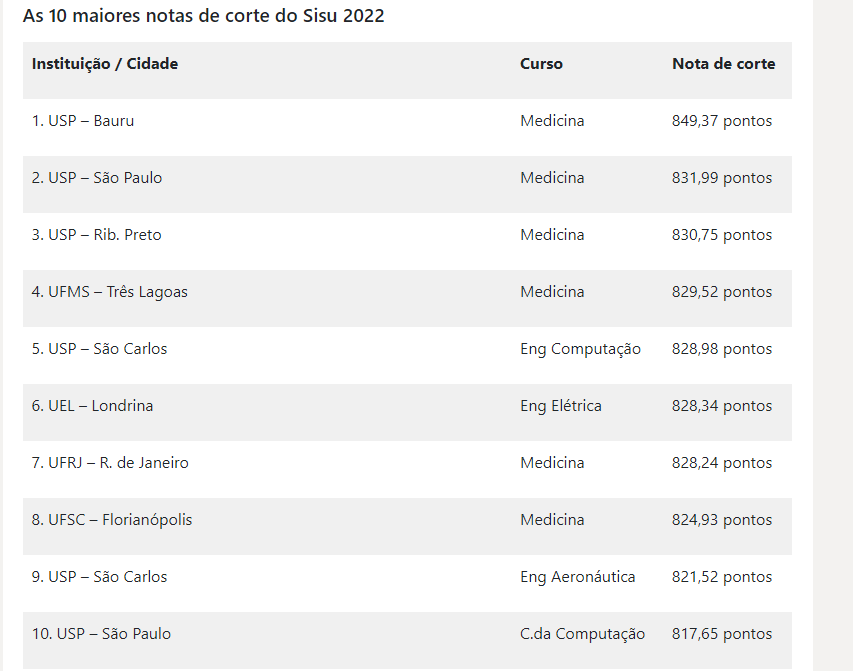

#Importação dos dados

In [1]:
# Bibliotecas principais
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from numpy.random import RandomState
import zipfile

In [2]:
!wget --no-check-certificate https://download.inep.gov.br/microdados/microdados_enem_2021.zip

--2023-03-12 16:02:15--  https://download.inep.gov.br/microdados/microdados_enem_2021.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 498188358 (475M) [application/zip]
Saving to: ‘microdados_enem_2021.zip’

microdados_enem_202 100%[===================>] 475.11M   708KB/s    in 11m 0s  

2023-03-12 16:13:16 (737 KB/s) - ‘microdados_enem_2021.zip’ saved [498188358/498188358]



#Extração dos dados

In [3]:
# open zipped dataset
with zipfile.ZipFile("microdados_enem_2021.zip") as z:
  # open the csv file in the dataset
  with z.open("DADOS/MICRODADOS_ENEM_2021.csv") as f:
      # read the dataset
      enem_df = pd.read_csv(f, sep=';', encoding='latin-1')

#Visualização dos dados

In [4]:
enem_df

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3144805,Nova Lima,31,MG,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN,1.0,140.0,120.0,120.0,180.0,200.0,760.0,F,F,B,B,3.0,D,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2704302,Maceió,27,AL,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,120.0,120.0,120.0,80.0,560.0,B,B,B,B,3.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3515707,Ferraz de Vasconcelos,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,C,B,3.0,C,A,B,B,A,A,B,B,A,A,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0,2.30e+06,Crato,23.0,CE,2.0,1.0,1.0,2304202,Crato,23,CE,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA,1.0,120.0,180.0,120.0,200.0,160.0,780.0,B,B,B,B,6.0,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0,2.31e+06,Redenção,23.0,CE,2.0,1.0,1.0,2300150,Acarape,23,CE,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE,1.0,120.0,140.0,160.0,180.0,180.0,780.0,D,E,F,D,4.0,C,A,B,C,A,A,B,A,B,A,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5208707,Goiânia,52,GO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,5.0,C,C,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,

In [5]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

#Identificação das variáveis

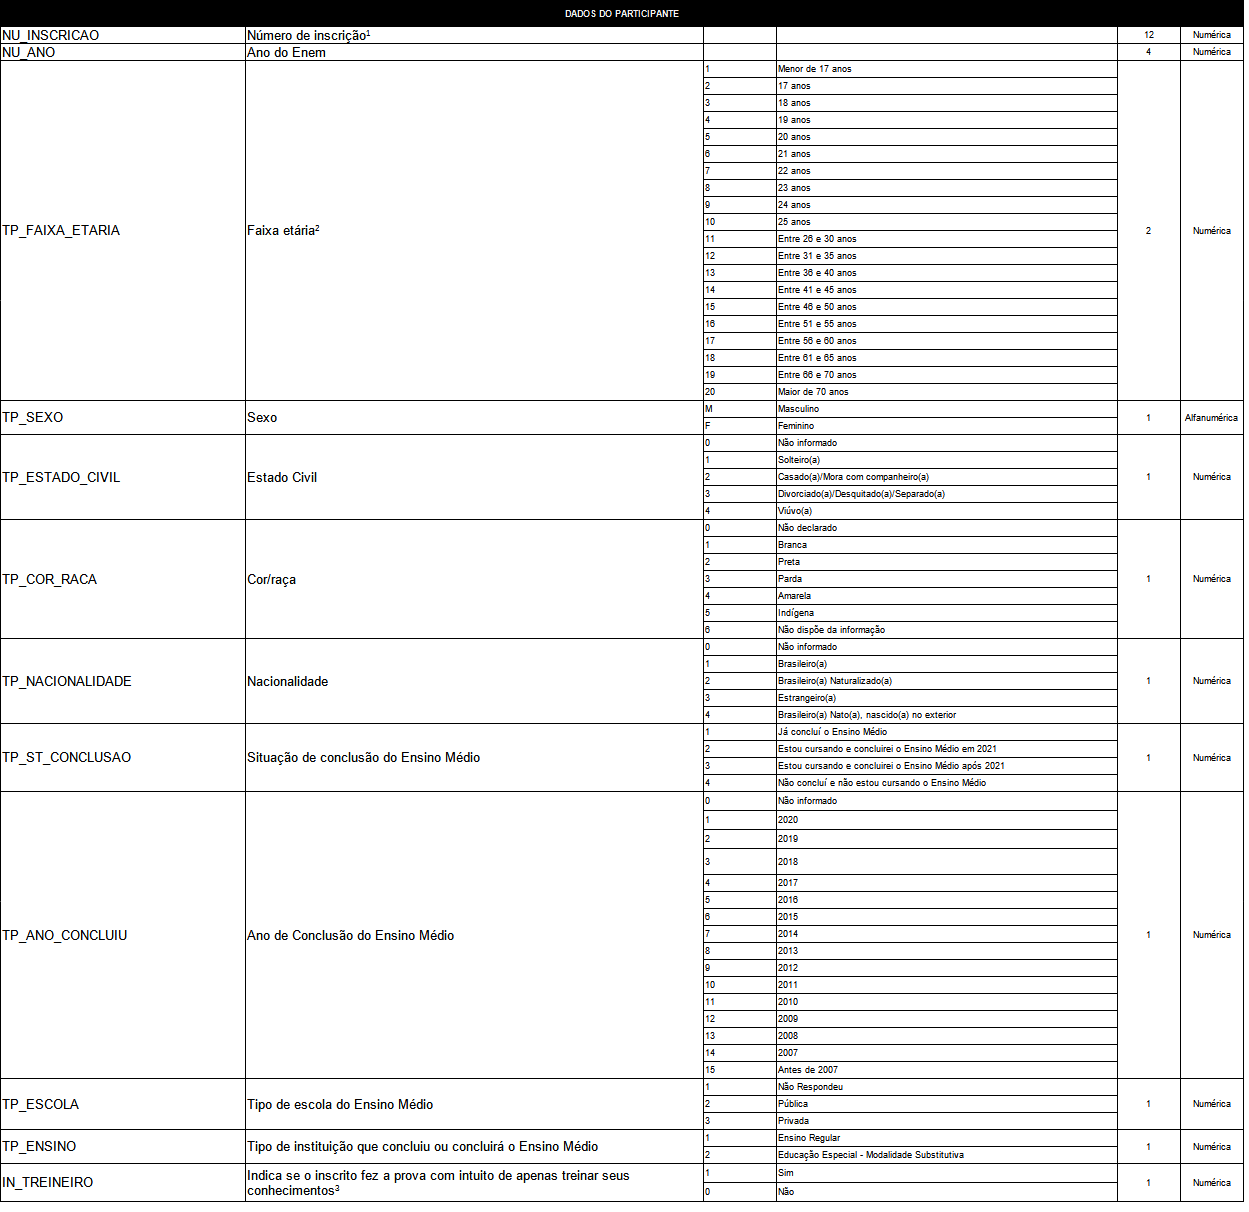

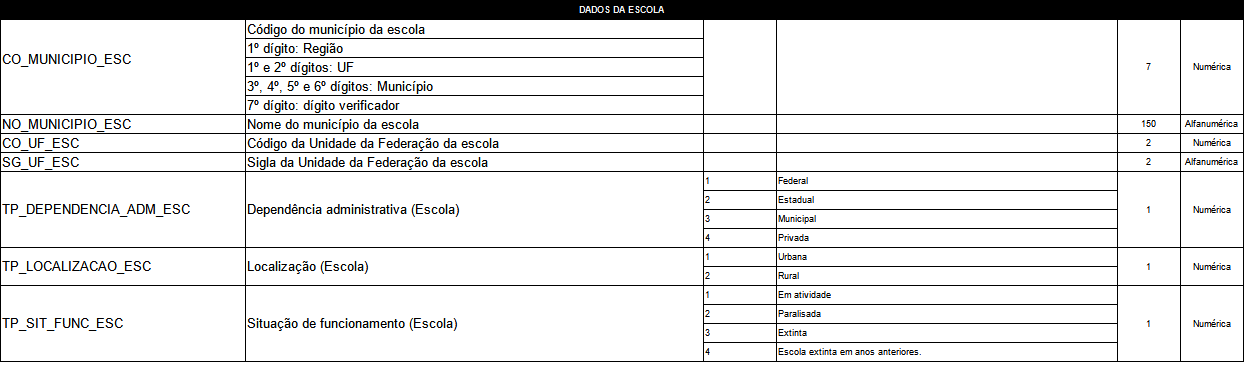

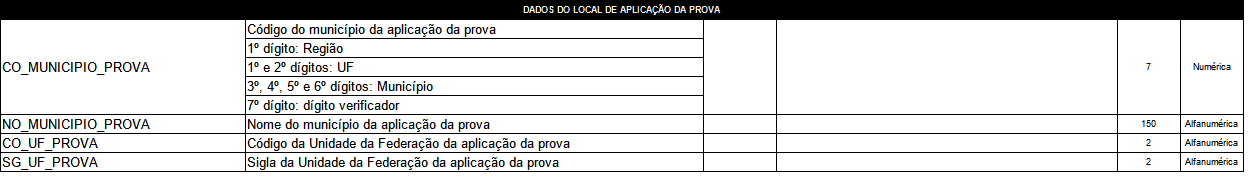

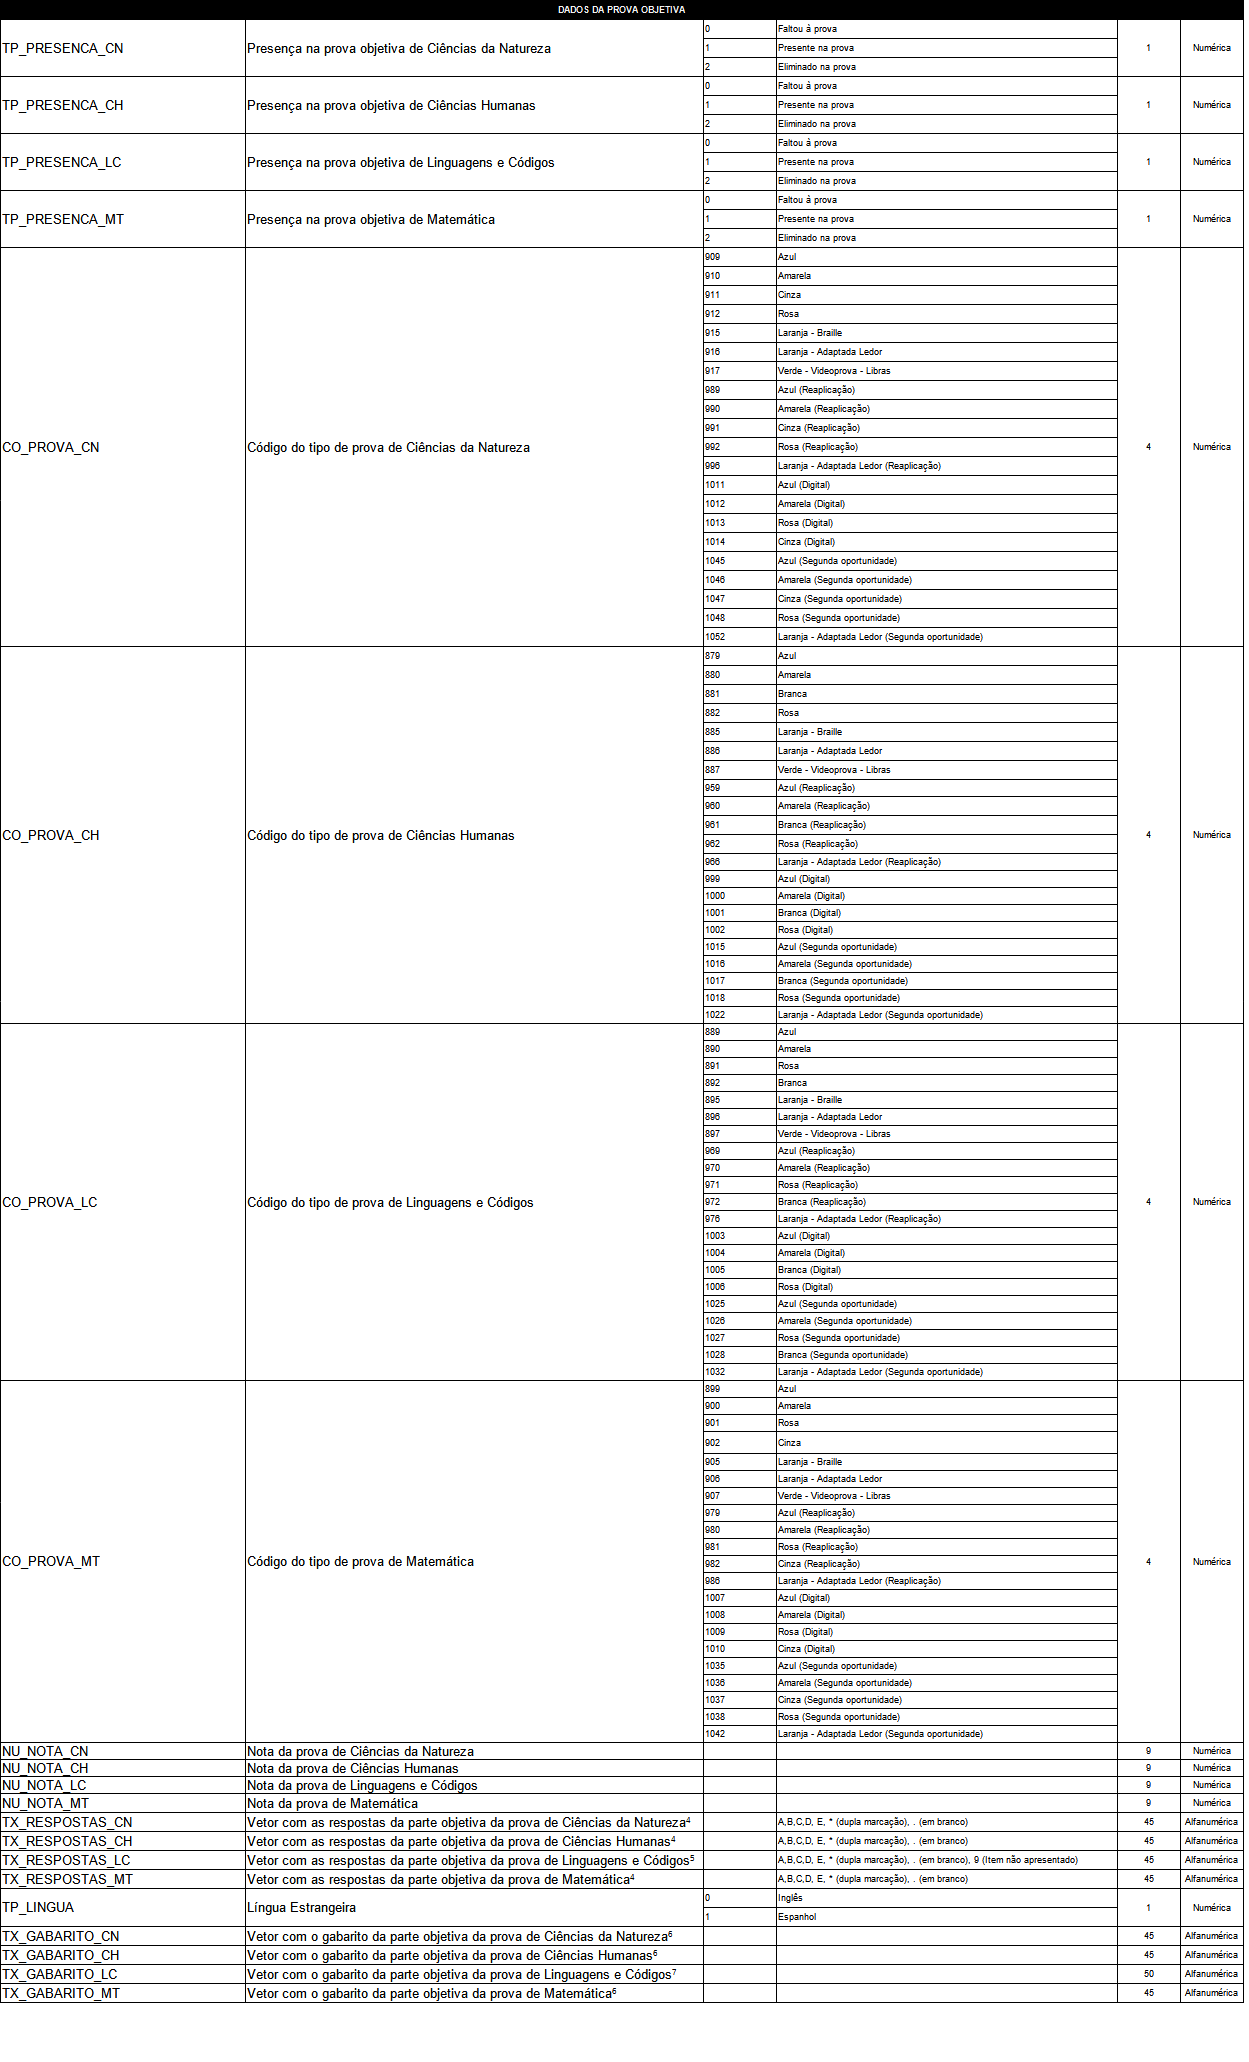

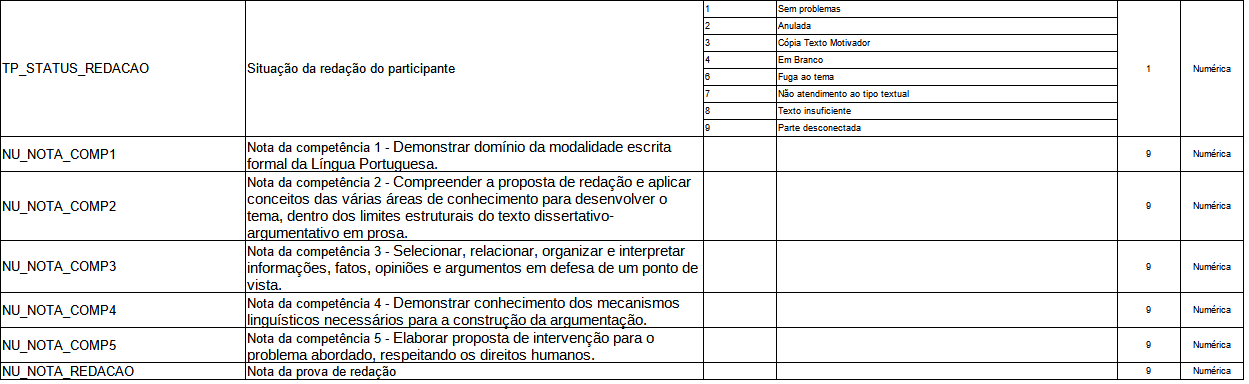

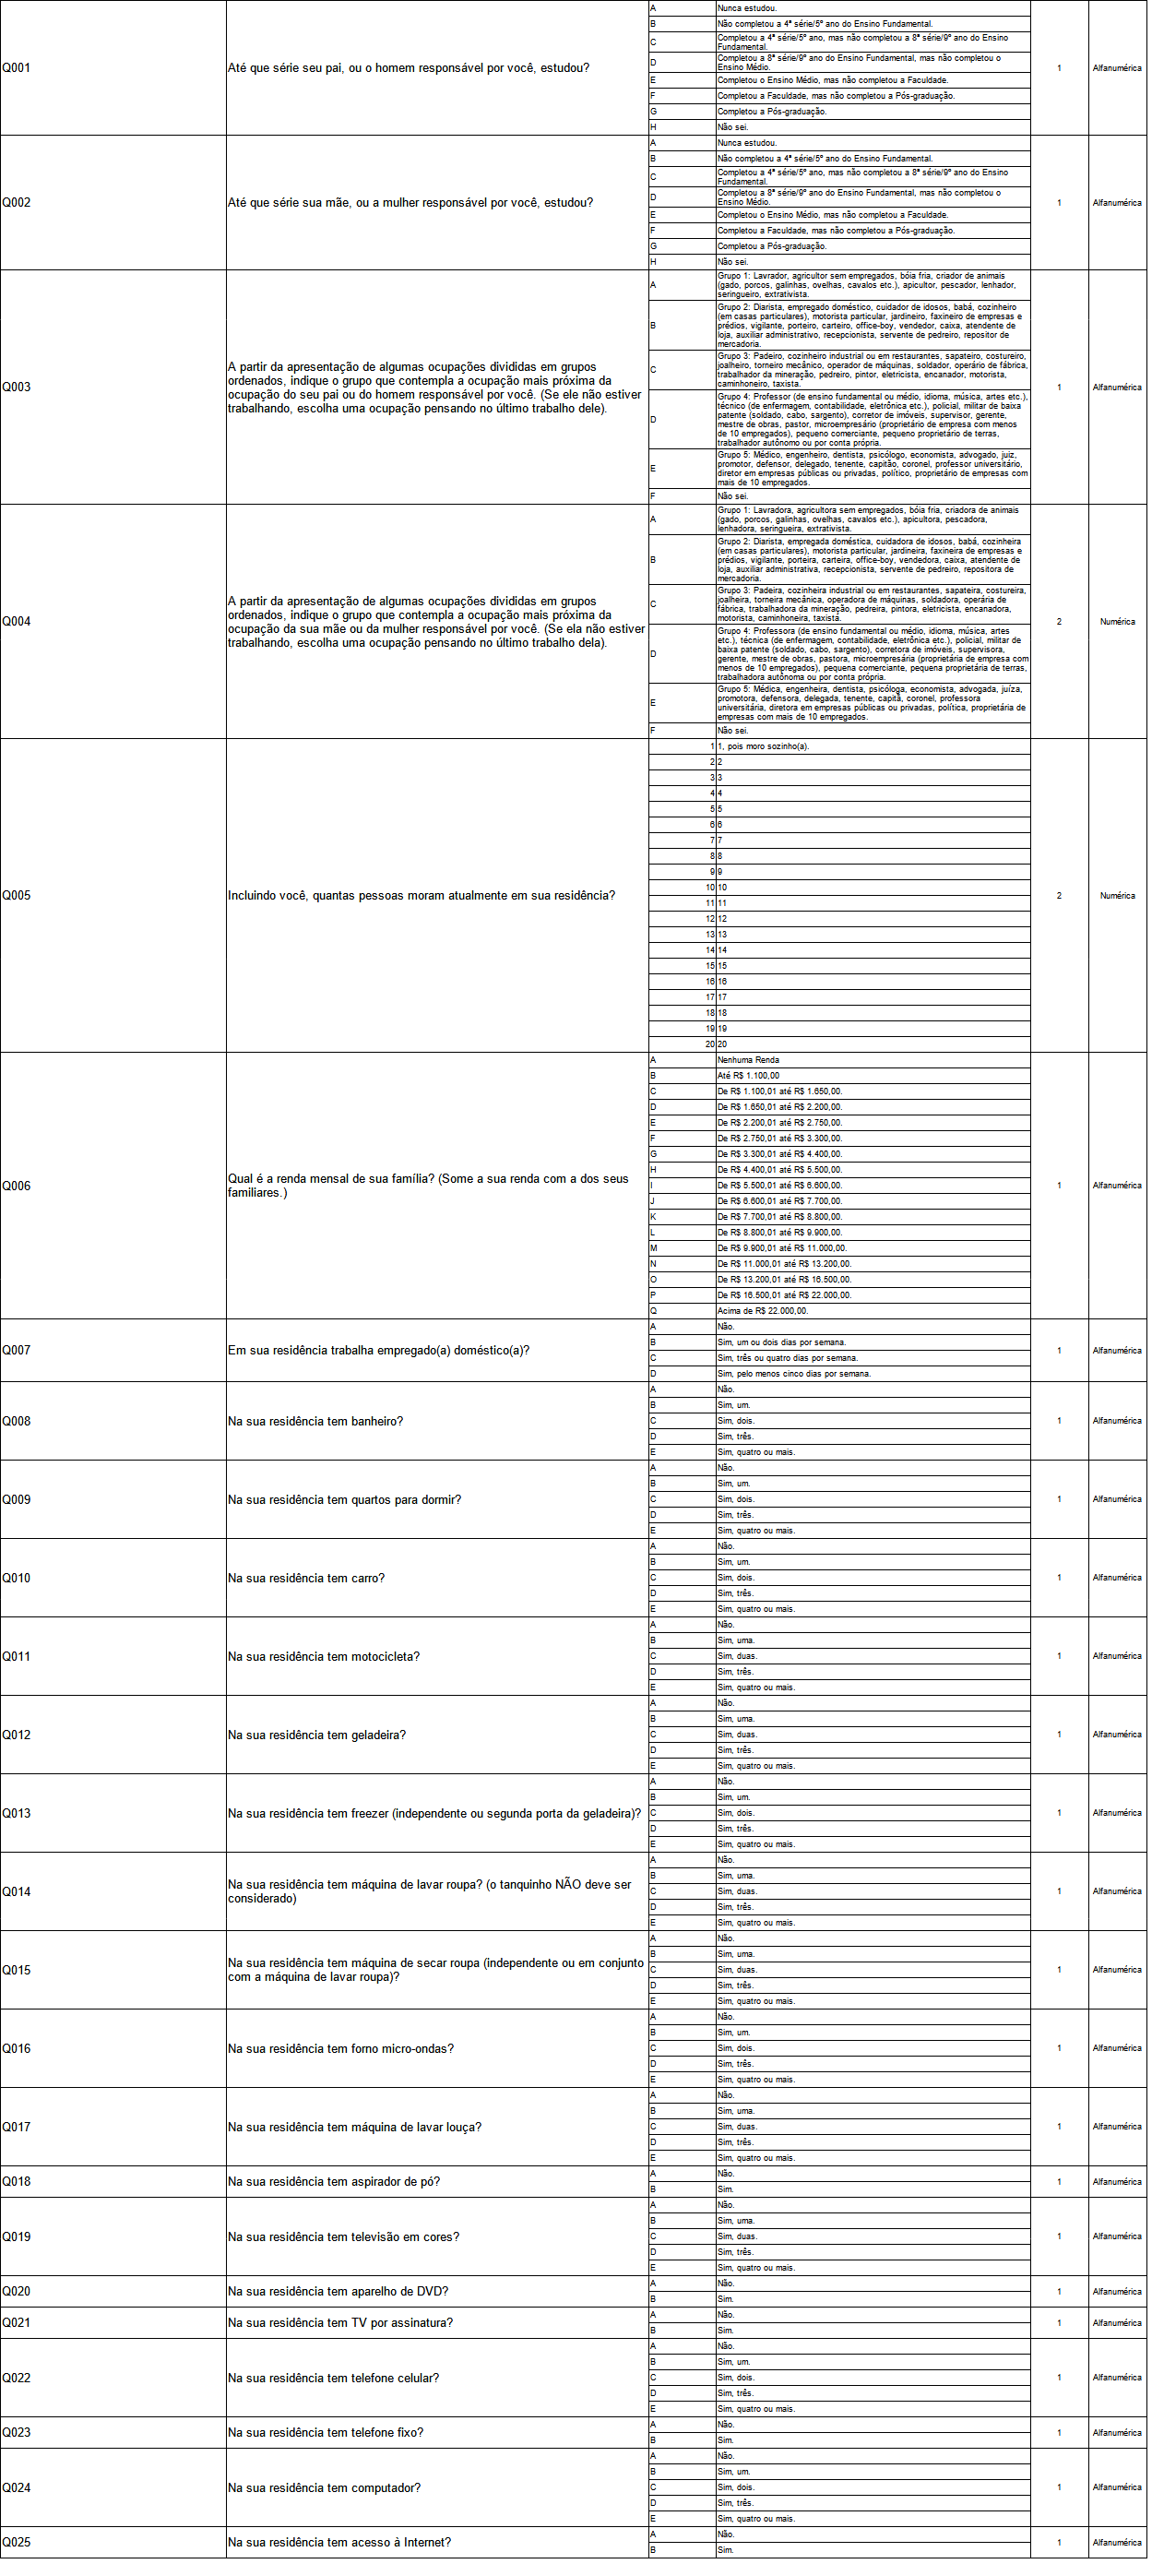

# Pré-processamento de dados

##Verificação de dados duplicados

In [6]:
# Remoção de dados/chaves que possam enviesar a verificação de duplicados
enem_df.drop(columns=['NU_INSCRICAO', 'NU_ANO'], inplace=True)

In [7]:
enem_df[enem_df.duplicated()]

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
28709,4,F,1,1,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100452,Buritis,11,RO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C,A,A,5.0,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,C,A,B,B
40233,5,F,1,3,1,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800308,Aracaju,28,SE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,B,B,3.0,B,A,B,D,A,B,B,B,B,B,B,A,A,C,A,A,E,A,B,B
47510,3,M,1,0,1,2,0,2,1.0,0,2.30e+06,Assaré,23.0,CE,2.0,2.0,1.0,2301604,Assaré,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,A,A,4.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
55388,3,M,1,0,1,2,0,2,1.0,0,2.30e+06,Assaré,23.0,CE,2.0,2.0,1.0,2301604,Assaré,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,A,A,4.0,B,A,B,B,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,A
57309,3,M,1,0,1,2,0,2,1.0,0,2.30e+06,Assaré,23.0,CE,2.0,2.0,1.0,2301604,Assaré,23,CE,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,H,A,A,5.0,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383294,11,F,1,3,1,1,12,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3143302,Montes Claros,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,A,A,2.0,C,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,C,B
3384597,9,F,1,1,1,1,6,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3302205,Itaperuna,33,RJ,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,C,D,4.0,G,A,D,D,B,B,B,A,B,A,B,A,B,C,A,A,E,A,C,B
3386628,11,F,1,1,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3503208,Araraquara,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,E,B,C,4.0,G,A,B,C,B,C,B,A,A,A,B,A,A,B,A,A,E,A,C,B
3387868,11,F,1,1,1,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3503208,Araraquara,35,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,F,B,3.0,C,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A


In [8]:
enem_df = enem_df.drop_duplicates()

In [9]:
enem_df.duplicated().values.any()

False

## Remoção de colunas que não serão utilizadas na análise


In [10]:
# Removidas as colunas que não serão utilizadas na análise
enem_df.drop(columns=['TP_ESTADO_CIVIL', 'IN_TREINEIRO', 
                      'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 
                      'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 
                      'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
                      'CO_PROVA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 
                      'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT','TP_ST_CONCLUSAO',
                      'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
                      'CO_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC',
                      'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
                      'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
                      'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
                      'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
                      'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
                      'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
                      'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_SIT_FUNC_ESC',
                      'Q001', 'Q002', 'Q003','Q004', 'Q005', 'Q007', 'Q008', 'Q009',
                      'Q010', 'Q011' ,'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
                      'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023'], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


##Analisando os candidatos PRESENTES na prova

In [11]:
# Removendo os alunos que faltaram ou foram eliminados na prova
enem_df = enem_df.loc[(enem_df['TP_PRESENCA_CN'] == 1) & (enem_df['TP_PRESENCA_CH'] == 1) & 
                      (enem_df['TP_PRESENCA_LC'] == 1) & (enem_df['TP_PRESENCA_MT'] == 1)]

In [14]:
# Agora que restaram apenas linhas com candidatos PRESENTES, removemos as colunas
enem_df.drop(columns=['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'], inplace=True)

In [15]:
enem_df

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q024,Q025
1,12,M,1,1,NaN,505.9,551.8,498.3,461.5,560.0,B,A,A
3,3,M,3,2,CE,580.7,678.9,638.9,659.5,780.0,B,B,B
4,2,F,3,2,CE,497.7,532.4,457.6,582.6,780.0,C,B,B
8,8,F,3,2,NaN,487.4,476.5,450.7,493.4,520.0,B,A,B
9,4,F,3,2,NaN,507.6,539.2,494.6,413.3,380.0,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389793,15,F,1,1,NaN,506.0,405.2,416.3,450.4,240.0,D,B,B
3389807,14,M,3,1,NaN,435.6,531.2,534.7,399.2,320.0,E,B,B
3389814,10,M,1,1,NaN,576.9,605.6,631.0,678.0,640.0,B,C,B
3389815,5,F,3,1,NaN,449.9,368.2,466.3,370.0,540.0,A,A,B


##Criação de colunas para o dataframe

###Coluna para média de notas

In [17]:
# Criação da coluna de média das notas
soma_notas = enem_df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

enem_df['APROVADO'] = soma_notas.sum(axis=1) / 5
enem_df['APROVADO'] = enem_df.APROVADO.apply(lambda x: 0 if x < 800 else 1)

In [18]:
# Removendo as colunas após o cálculo das médias
enem_df.drop(columns=['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_REDACAO'], inplace=True)

###Coluna para agrupar estados por regiões

In [55]:
uf_regioes = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste', 
              'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 
              'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste', 
              'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste', 
              'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 
              'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}

# mapeamento da coluna SG_UF_ESC para a nova coluna REGIAO_ESCOLA
enem_df['REGIAO_ESCOLA'] = enem_df['SG_UF_ESC'].map(uf_regioes)

In [57]:
# Removendo a coluna após o agrupamento
enem_df.drop(columns='SG_UF_ESC', inplace=True)

##Renomenado colunas do dataframe

In [20]:
enem_df.rename(columns = {'Q006':'RENDA', 'Q024':'COMPUTADOR', 'Q025':'INTERNET'}, inplace = True)

##Verificação de dados nulos

In [16]:
enem_df.isna().sum()

TP_FAIXA_ETARIA          0
TP_SEXO                  0
TP_COR_RACA              0
TP_ESCOLA                0
SG_UF_ESC          1635656
NU_NOTA_CN               0
NU_NOTA_CH               0
NU_NOTA_LC               0
NU_NOTA_MT               0
NU_NOTA_REDACAO          0
Q006                     1
Q024                     1
Q025                     1
dtype: int64

In [27]:
enem_df.loc[enem_df['RENDA'].isnull()]

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,RENDA,COMPUTADOR,INTERNET,APROVADO
707314,8,F,4,1,NaN,NaN,NaN,NaN,0


In [28]:
enem_df.drop(index=707314, inplace=True)

## Resetando index do dataframe

In [36]:
enem_df = enem_df.reset_index(drop=True)

#Análise exploratória dos atributos

In [37]:
enem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238106 entries, 0 to 2238105
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   TP_FAIXA_ETARIA  int64 
 1   TP_SEXO          object
 2   TP_COR_RACA      int64 
 3   TP_ESCOLA        int64 
 4   SG_UF_ESC        object
 5   RENDA            object
 6   COMPUTADOR       object
 7   INTERNET         object
 8   APROVADO         int64 
dtypes: int64(4), object(5)
memory usage: 153.7+ MB


##Transformação de Atributos para Análise Exploratória

####Atributo: Internet

In [45]:
enem_df['INTERNET'].unique()

array([False,  True])

In [38]:
enem_df['INTERNET'] = enem_df['INTERNET'].map({'A': False, 'B': True})

####Atributo: Aprovado

In [46]:
enem_df['APROVADO'].unique()

array([False,  True])

In [40]:
enem_df['APROVADO'] = enem_df['APROVADO'].astype('bool')

##Sumarização dos dados categóricos

In [72]:
enem_df.describe(include='O')

,TP_SEXO,RENDA,COMPUTADOR,REGIAO_ESCOLA
count,2238106,2238106,2238106,602451
unique,2,17,5,5
top,F,B,B,Sudeste
freq,1381948,546733,954011,221783


A partir desta análise inferimos que:
*   Há a maior presença de candidatos do sexo feminino;
*   A maior parte dos candidatos possuem renda de até R$ 1.100,00;
*   A maioria dos candidatos possuem apenas 1 computador.
*   A maior parte dos candidatos são da região Sudeste.



##Atributo: Faixa etária

In [31]:
enem_df['TP_FAIXA_ETARIA'].unique()

array([12,  3,  2,  8,  4,  5, 11,  7, 13,  1, 10,  9,  6, 14, 16, 15, 17,
       18, 19, 20])

In [50]:
enem_df['TP_FAIXA_ETARIA'].value_counts(sort=True)

3     524438
2     516508
4     259966
1     232839
5     151394
6      99476
11     98780
7      69875
12     55879
8      50703
9      40979
13     40716
10     32499
14     27010
15     17519
16     10581
17      5674
18      2216
19       744
20       310
Name: TP_FAIXA_ETARIA, dtype: int64

- Os grupos de idades que mais realizaram a prova do ENEM no ano de 2021 foram os grupos de 18 e 17 anos (respectivamente, 524.438 e 516.508 candidatos), seguido pelos grupos de 19, até 17 e 20 anos, com números de candidatos menores que 260 mil.

- Os grupos de idade entre 56 e 70 anos (grupos 17 a 20), tiveram a menor expressão de dados, somando 8.944 candidatos ao todo.

##Atributo: Sexo

In [22]:
enem_df['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [51]:
enem_df['TP_SEXO'].value_counts(sort=True)

F    1381948
M     856158
Name: TP_SEXO, dtype: int64

O maior número de candidatos inscritos e presentes durante a prova foi do sexo **feminino**, totalizando 1.381.948 candidatos.

##Atirbuto: Cor/Raça

In [32]:
enem_df['TP_COR_RACA'].unique()

array([1, 3, 2, 4, 5, 0, 6])

In [52]:
enem_df['TP_COR_RACA'].value_counts(sort=True)

1    979456
3    912861
2    246568
4     44946
0     43733
5     10540
6         2
Name: TP_COR_RACA, dtype: int64

- As raças mais expressivas dentre os candidatos presentes nas provas foram: branca e parda com mais de 910.000 candidatos (979.456 e 912.861 candidatos, respectivamente). Seguidos da raça preta com 246.568 candidatos.

##Atributo: Escola

In [33]:
enem_df['TP_ESCOLA'].unique()

array([1, 2, 3])

In [53]:
enem_df['TP_ESCOLA'].value_counts(sort=True)

1    1390709
2     668036
3     179361
Name: TP_ESCOLA, dtype: int64

- A maior parte dos candidatos que selecionaram o tipo de escola do ensino médio foram de escolas públicas (668.036 candidatos), enquanto que os candidatos de escolas privadas somaram 179.361 candidatos.

##Atributo: Renda

In [23]:
enem_df['RENDA'].unique()

array(['B', 'C', 'D', 'G', 'H', 'F', 'E', 'A', 'I', 'J', 'O', 'K', 'M',
       'Q', 'N', 'L', 'P', nan], dtype=object)

In [61]:
enem_df['RENDA'].value_counts(sort=True)

B    546733
C    346838
D    277708
F    168049
G    147647
E    143957
H    118749
A    112899
I     75420
M     47849
J     46934
Q     39914
K     37157
O     32862
P     32802
L     32560
N     30028
Name: RENDA, dtype: int64

- A maior parte dos candidatos que fizeram a prova do ENEM possuíam rendas de até 1.100 reais ou até 2.200 reais (grupos B: 546.733 candidatos, C: 346.838 candidatos e D: 277.708 candidatos).

##Atributo: Computador

In [34]:
enem_df['COMPUTADOR'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [62]:
enem_df['COMPUTADOR'].value_counts(sort=True)

B    954011
A    833126
C    279242
D    113143
E     58584
Name: COMPUTADOR, dtype: int64

- Grande parte dos candidatos que fizeram o ENEM possuíam pelo menos um computador em casa (Grupo B: 954.011 candidatos).
- Cerca de 833.126 candidatos não possuíam computador em casa.
- O total de candidatos que possuíam computadores em casa foi de: 1.404.980 candidatos, quase 60% dos dados da análise.

##Atributo: Internet

In [63]:
enem_df['INTERNET'].unique()

array([False,  True])

In [64]:
enem_df['INTERNET'].value_counts(sort=True)

True     2048739
False     189367
Name: INTERNET, dtype: int64

- Cerca de 91% dos candidatos que fizeram a prova (2.048.739 candidatos) possuíam internet em suas residências.

##Atributo: Aprovado

In [65]:
enem_df['APROVADO'].unique()

array([False,  True])

In [66]:
enem_df['APROVADO'].value_counts(sort=True)

False    2236297
True        1809
Name: APROVADO, dtype: int64

- Conforme análise, apenas 1809 candidatos obtiveram nota de corte > 800 pontos, por isso consideraram-se como aprovados.

##Atributo: Região escola

In [59]:
enem_df['REGIAO_ESCOLA'].unique()

array([nan, 'Nordeste', 'Sudeste', 'Norte', 'Sul', 'Centro-Oeste'],
      dtype=object)

In [60]:
enem_df['REGIAO_ESCOLA'].value_counts(sort=True)

Sudeste         221783
Nordeste        191057
Sul              80978
Centro-Oeste     56614
Norte            52019
Name: REGIAO_ESCOLA, dtype: int64

- Os maiores volumes de candidatos que fizeram a prova do ENEM estão nas regiões Sudeste e Nordeste (221.783 e 191.057 candidatos, respectivamente).
- As regiões Sul, Centro-Oeste e Norte somam 189.611 candidatos que fizeram a prova.

#ANOTHER THING

In [ ]:
aprovado = enem_df.loc[enem_df['APROVADO'] == 1]

##Atributo Faixa Etária

In [ ]:
group_byAgeGroup = enem_df.groupby('APROVADO')['TP_FAIXA_ETARIA'].value_counts()
group_byAgeGroup

APROVADO  TP_FAIXA_ETARIA
False     3                  524460
          2                  516672
          4                  259833
          1                  233046
          5                  151293
          6                   99364
          11                  98782
          7                   69865
          12                  55904
          8                   50695
          9                   40971
          13                  40748
          10                  32502
          14                  27024
          15                  17537
          16                  10589
          17                   5678
          18                   2218
          19                    744
          20                    311
True      3                     435
          4                     347
          2                     295
          5                     235
          6                     179
          7                      79
          11                     74
  

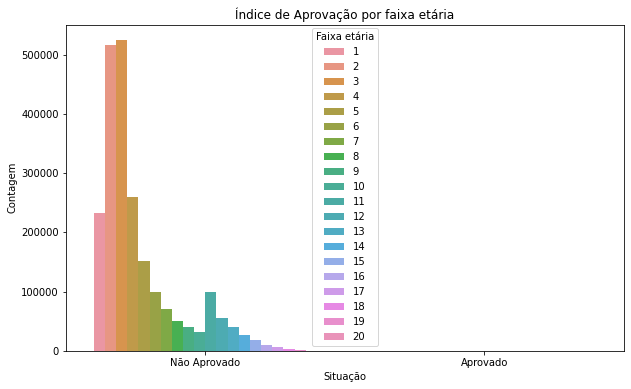

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_FAIXA_ETARIA', ax=ax)

plt.title('Índice de Aprovação por faixa etária')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Observou-se que o maior número de reprovados está na faixa etária de 18 anos, seguidos pela faixa etária de 17 anos e em seguida a faixa etária de 19 anos.

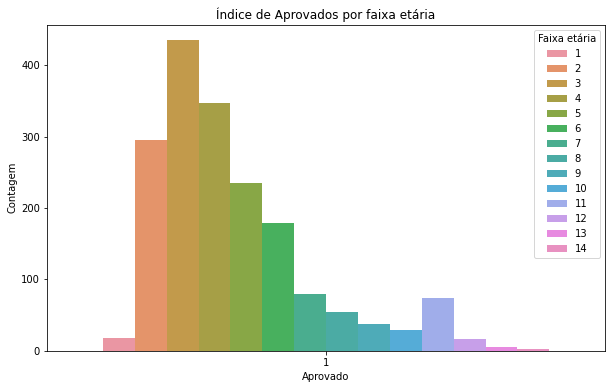

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_FAIXA_ETARIA', ax=ax)

plt.title('Índice de Aprovados por faixa etária')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Faixa etária')

plt.show()

Observou-se que o maior número de aprovados está na faixa etária de 18 anos, seguidos pela faixa etária de 19 anos e em seguida a faixa etária de 17 anos.

##Atributo Sexo

In [ ]:
group_bySex = enem_df.groupby('APROVADO')['TP_SEXO'].value_counts()
group_bySex

APROVADO  TP_SEXO
False     F          1382203
          M           856033
True      M             1050
          F              759
Name: TP_SEXO, dtype: int64

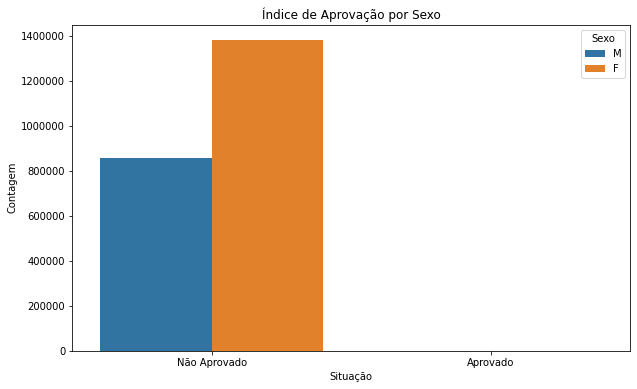

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_SEXO', ax=ax)

plt.title('Índice de Aprovação por Sexo')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Sexo')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Notou-se que, no ano de 2021, tiveram mais mulheres reprovadas do que homens.

Como a discrepância entre o volume de APROVADOS e NÃO APROVADOS é muito grande, foi necessário gerar um gráfico somente com APROVADOS.

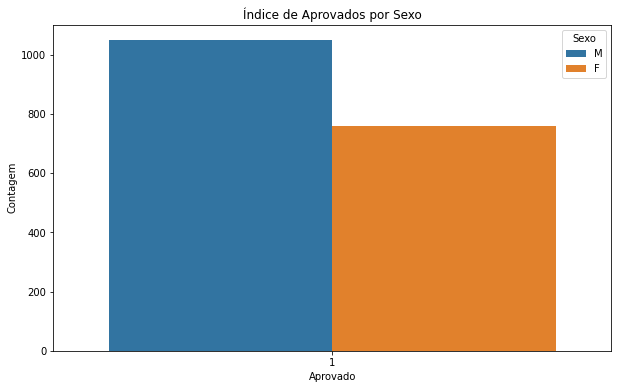

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_SEXO', ax=ax)

plt.title('Índice de Aprovados por Sexo')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Sexo')

plt.show()

Notou-se que, no ano de 2021, tiveram mais homens aprovados do que mulheres.

##Atributo Raça

In [ ]:
enem_df['TP_COR_RACA'].value_counts()

1    980260
3    913671
2    246801
4     44989
0     43767
5     10555
6         2
Name: TP_COR_RACA, dtype: int64

No ano de 2021, o grupo com maior inscritos foi da cor/raça branca, seguido pela cor/raça preto e depois cor/raça parda.

In [ ]:
group_byRace = enem_df.groupby('APROVADO')['TP_COR_RACA'].value_counts()
group_byRace

APROVADO  TP_COR_RACA
False     1              978855
          3              913400
          2              246766
          4               44930
          0               43728
          5               10555
          6                   2
True      1                1405
          3                 271
          4                  59
          0                  39
          2                  35
Name: TP_COR_RACA, dtype: int64

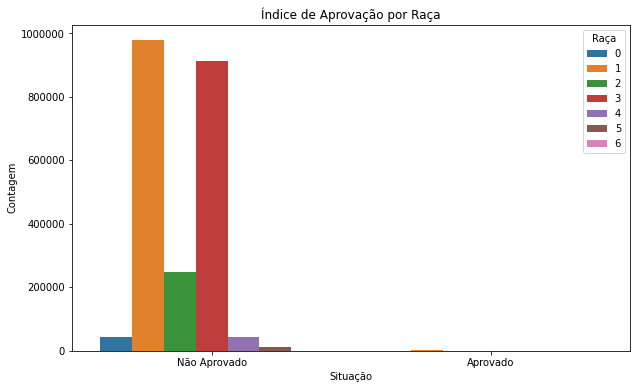

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_COR_RACA', ax=ax)

plt.title('Índice de Aprovação por Raça')
plt.xlabel('Situação')
plt.ylabel('Contagem')
# plt.legend(title='Raça', labels=['Não declarada', 'Branca', 'Preta', 'Parda', 
#                                  'Amarela', 'Indígena', 'Não Informada'], 
#            loc='upper right')
plt.legend(title='Raça', loc='upper right')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A maior parte dos reprovados pertence ao grupos dos brancos, seguido pelo grupo dos pardos pretos.

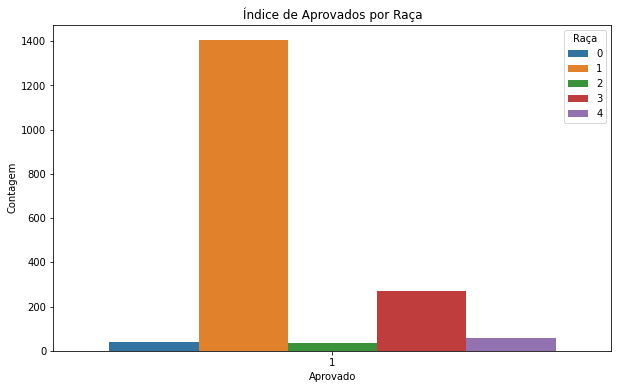

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_COR_RACA', ax=ax)

plt.title('Índice de Aprovados por Raça')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
# plt.legend(title='Raça', labels=['Não declarada', 'Branca', 'Preta', 'Parda', 
#                                  'Amarela', 'Indígena', 'Não Informada'])
plt.legend(title='Raça')

plt.show()

Observou-se que a grande maioria dos aprovados pertence ao grupo de brancos, seguido pelo grupo de pardo e depois grupo de cor amarela.

##Atributo Escola

In [ ]:
enem_df['TP_ESCOLA'].value_counts()

1    1391910
2     668650
3     179485
Name: TP_ESCOLA, dtype: int64

A maioria dos inscritos não informou o tipo de escola. Dos que informaram, a maioria dos inscritos estudou em escola pública.

In [ ]:
group_bySchool = enem_df.groupby('APROVADO')['TP_ESCOLA'].value_counts()
group_bySchool

APROVADO  TP_ESCOLA
False     1            1390562
          2             668566
          3             179108
True      1               1348
          3                377
          2                 84
Name: TP_ESCOLA, dtype: int64

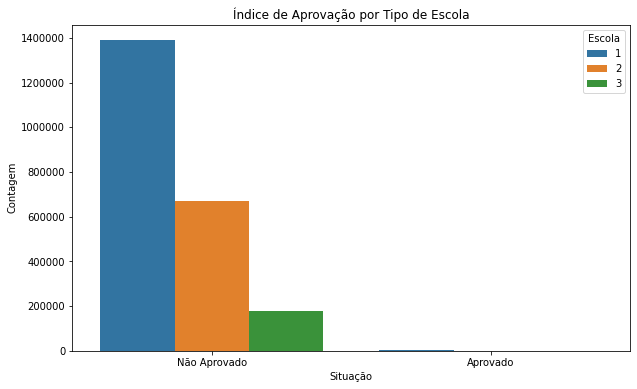

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='TP_ESCOLA', ax=ax)

plt.title('Índice de Aprovação por Tipo de Escola')
plt.xlabel('Situação')
plt.ylabel('Contagem')
# plt.legend(title='Escola', labels=['Não Respondeu', 'Pública', 'Privada'])
plt.legend(title='Escola')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

O tipo de escola não nos permite encontrar um padrão, pois a maioria dos incritos não aprovados não informou o seu tipo de escola. Contudo, comparando os dados conhecidos, temos que a maioria dos rerovados estudou em escola pública.

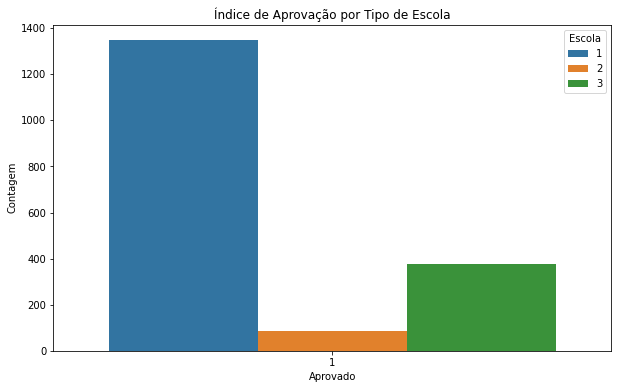

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='TP_ESCOLA', ax=ax)

plt.title('Índice de Aprovação por Tipo de Escola')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
# plt.legend(title='Escola', labels=['Não Respondeu', 'Pública', 'Privada'])
plt.legend(title='Escola')

plt.show()

Novamente, o tipo de escola não nos permite encontrar um padrão, pois a maioria dos incritos não aprovados não informou o seu tipo de escola. Contudo, comparando os dados conhecidos, temos que a maioria dos aprovados estudou em escola privada.

##Atributo Renda

In [ ]:
enem_df['RENDA'].value_counts()

B    547176
C    347172
D    277959
F    168198
G    147769
E    144091
H    118851
A    112993
I     75468
M     47884
J     46973
Q     39957
K     37191
O     32891
P     32830
L     32584
N     30058
Name: RENDA, dtype: int64

A maioria dos incritos tem renda familiar na faixa de até 1.100,00, seguido pelos canditados que têm renda familiar de R$ 1.100,01 até R$ 1.650,00' e depois pelos que possuem renda familiar de R$ 1.650,01 até R$ 2.200,00.

In [ ]:
group_byIncome = enem_df.groupby('APROVADO')['RENDA'].value_counts()
group_byIncome

APROVADO  RENDA
False     B        547158
          C        347142
          D        277909
          F        168128
          G        147671
          E        144048
          H        118708
          A        112991
          I         75351
          M         47724
          J         46897
          Q         39625
          K         37095
          O         32727
          P         32627
          L         32498
          N         29937
True      Q           332
          P           203
          O           164
          M           160
          H           143
          N           121
          I           117
          G            98
          K            96
          L            86
          J            76
          F            70
          D            50
          E            43
          C            30
          B            18
          A             2
Name: RENDA, dtype: int64

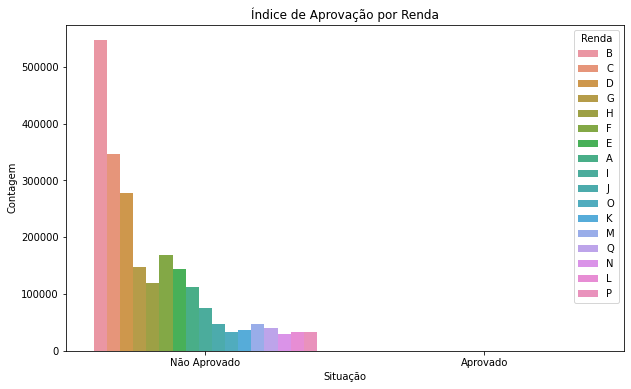

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='RENDA', ax=ax)

plt.title('Índice de Aprovação por Renda')
plt.xlabel('Situação')
plt.ylabel('Contagem')
# plt.legend(title='Renda', labels=['Nenhuma renda', 'Até R$ 1.100,00', 
#                                   'R$ 1.100,01 até R$ 1.650,00', 
#                                   'R$ 1.650,01 até R$ 2.200,00',
#                                   'R$ 2.200,01 até R$ 2.750,00',
#                                   'R$ 2.750,01 até R$ 3.300,00',
#                                   'R$ 3.300,01 até R$ 4.400,00',
#                                   'R$ 4.400,01 até R$ 5.500,00',
#                                   'R$ 5.500,01 até R$ 6.600,00',
#                                   'R$ 6.600,01 até R$ 7.700,00',
#                                   'R$ 7.700,01 até R$ 8.800,00',
#                                   'R$ 8.800,01 até R$ 9.900,00',
#                                   'R$ 9.900,01 até R$ 11.000,00',
#                                   'R$ 11.000,01 até R$ 13.200,00',
#                                   'R$ 13.200,01 até R$ 16.500,00',
#                                   'R$ 16.500,01 até R$ 22.000,00',
#                                   'Acima de R$ 22.000,00'])
plt.legend(title='Renda')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Observou-se que a maior parte dos reprovados pertence aos grupos com menor renda familiar. 

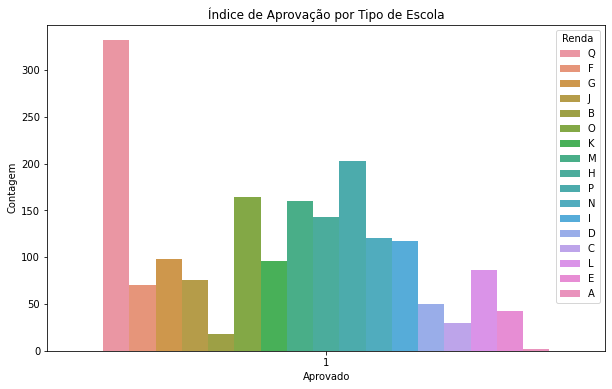

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='RENDA', ax=ax)

plt.title('Índice de Aprovação por Tipo de Escola')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Renda')

plt.show()

Foi obervado que a maior concentração dos aprovados está nas maiores faixas de renda familiar.

##Atributo Computador

In [ ]:
enem_df['COMPUTADOR'].value_counts()

B    954822
A    833851
C    279492
D    113242
E     58638
Name: COMPUTADOR, dtype: int64

A maioria dos incritos possui um computador em casa, seguidos por nenhum computador e depois por 2 computadores.

In [ ]:
group_byComputer = enem_df.groupby('APROVADO')['COMPUTADOR'].value_counts()
group_byComputer

APROVADO  COMPUTADOR
False     B             954434
          A             833821
          C             278902
          D             112801
          E              58278
True      C                590
          D                441
          B                388
          E                360
          A                 30
Name: COMPUTADOR, dtype: int64

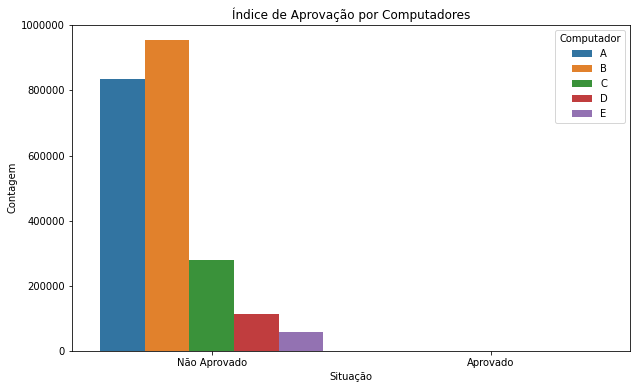

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='COMPUTADOR', ax=ax)

plt.title('Índice de Aprovação por Computadores')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Computador')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A maioria dos reprovados possui um ou nenhum computador em casa.

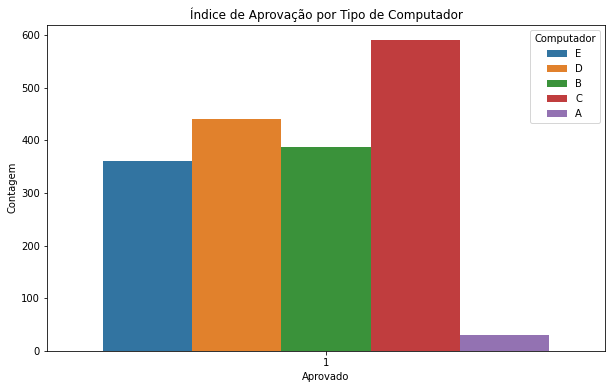

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='COMPUTADOR', ax=ax)

plt.title('Índice de Aprovação por Tipo de Computador')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Computador')

plt.show()

A maioria dos aprovados possui 2 computadores em casa, enquanto que a monoria dos aprovados possui um computador.

##Atributo Internet

In [ ]:
enem_df['INTERNET'].value_counts()

True     2050515
False     189530
Name: INTERNET, dtype: int64

A maioria dos incritos possui internet em casa.

In [ ]:
group_byInternet = enem_df.groupby('APROVADO')['INTERNET'].value_counts()
group_byInternet

APROVADO  INTERNET
False     True        2048708
          False        189528
True      True           1807
          False             2
Name: INTERNET, dtype: int64

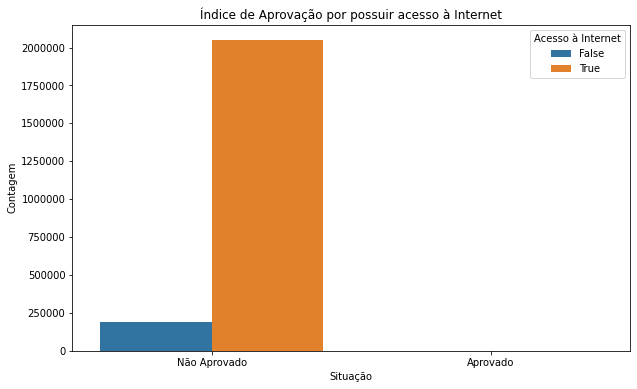

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=enem_df, x="APROVADO", hue='INTERNET', ax=ax)

plt.title('Índice de Aprovação por possuir acesso à Internet')
plt.xlabel('Situação')
plt.ylabel('Contagem')
plt.legend(title='Acesso à Internet')
plt.xticks([0,1], ['Não Aprovado', 'Aprovado'])
plt.ticklabel_format(style='plain', axis='y')

plt.show()

A maioria dos reprovados possui internet em casa.

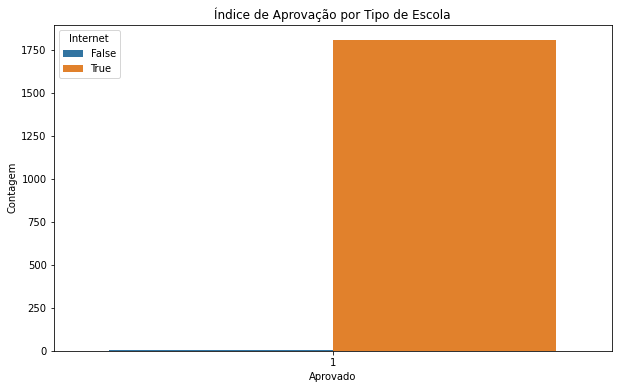

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=aprovado, x="APROVADO", hue='INTERNET', ax=ax)

plt.title('Índice de Aprovação por Tipo de Escola')
plt.xlabel('Aprovado')
plt.ylabel('Contagem')
plt.legend(title='Internet')

plt.show()

A grande maioria dos aprovados possui internet em casa.

#Aplicando os classificadores

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_df = enem_df.copy()
test_df = enem_df.copy()

###Cross-Validation

In [ ]:
cv = KFold(n_splits=10)
accuracies = list()
max_attributes = len(list(test_df))
depth_range = (1, max_attributes + 1)

In [ ]:
for depth in depth_range:
  fold_accuracy = []
  tree_model = tree.DecisionTreeClassifier(max_depth = depth)
  
  for train_fold, valid_fold in cv.split(train_df):
    f_train = train_df.loc[train_fold]
    f_valid = train_df.loc[valid_fold]

    model = tree_model.fit(X = f_train.drop(['APROVADO'], axis=1), 
                            y = f_train["APROVADO"])
    valid_acc = model.score(X = f_valid.drop(['APROVADO'], axis=1), 
                            y = f_valid["APROVADO"])
    fold_accuracy.append(valid_acc)

fold_accuracy

KeyError: ignored

###Árvore de Decisão

###Random Forest

###kNN

#Criação de Backup

In [5]:
backup = enem_df.copy()

# Separação do dataset (Treino e Teste)

In [6]:
train_df = enem_df.copy()
test_df = enem_df.copy()

In [ ]:
rng = RandomState(seed=3)

train_df = enem_df.sample(frac=0.8, random_state=rng)
test_df = enem_df.loc[~enem_df.index.isin(train_df.index)]